In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/booking-hotel-room/first inten project.csv')

In [3]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
#convert "date of reservation" column to datetime 
df['date of reservation'] = pd.to_datetime(df['date of reservation'],errors='coerce')

#Rename average price column to remove the space
df.rename(columns={'average price ': 'average price'}, inplace=True)

#Add a new column to indicate the day name of the reservation.
df['day of reservation'] =  df['date of reservation'].dt.day_name()

#drop NaT values. 
df.dropna(inplace = True) 

#Add new column to calculate total nights.
df['total nights'] = df['number of weekend nights'] + df['number of week nights']

#Add new column to determine if customers are family or not.   
df['guest type'] = df.apply(lambda x: 'Family' if x['number of children'] > 0 else 'Individual/Couple', axis=1)

df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,day of reservation,total nights,guest type
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,Friday,7,Family
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,Tuesday,4,Individual/Couple
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,Wednesday,4,Family
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,Saturday,2,Individual/Couple
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,Wednesday,3,Individual/Couple


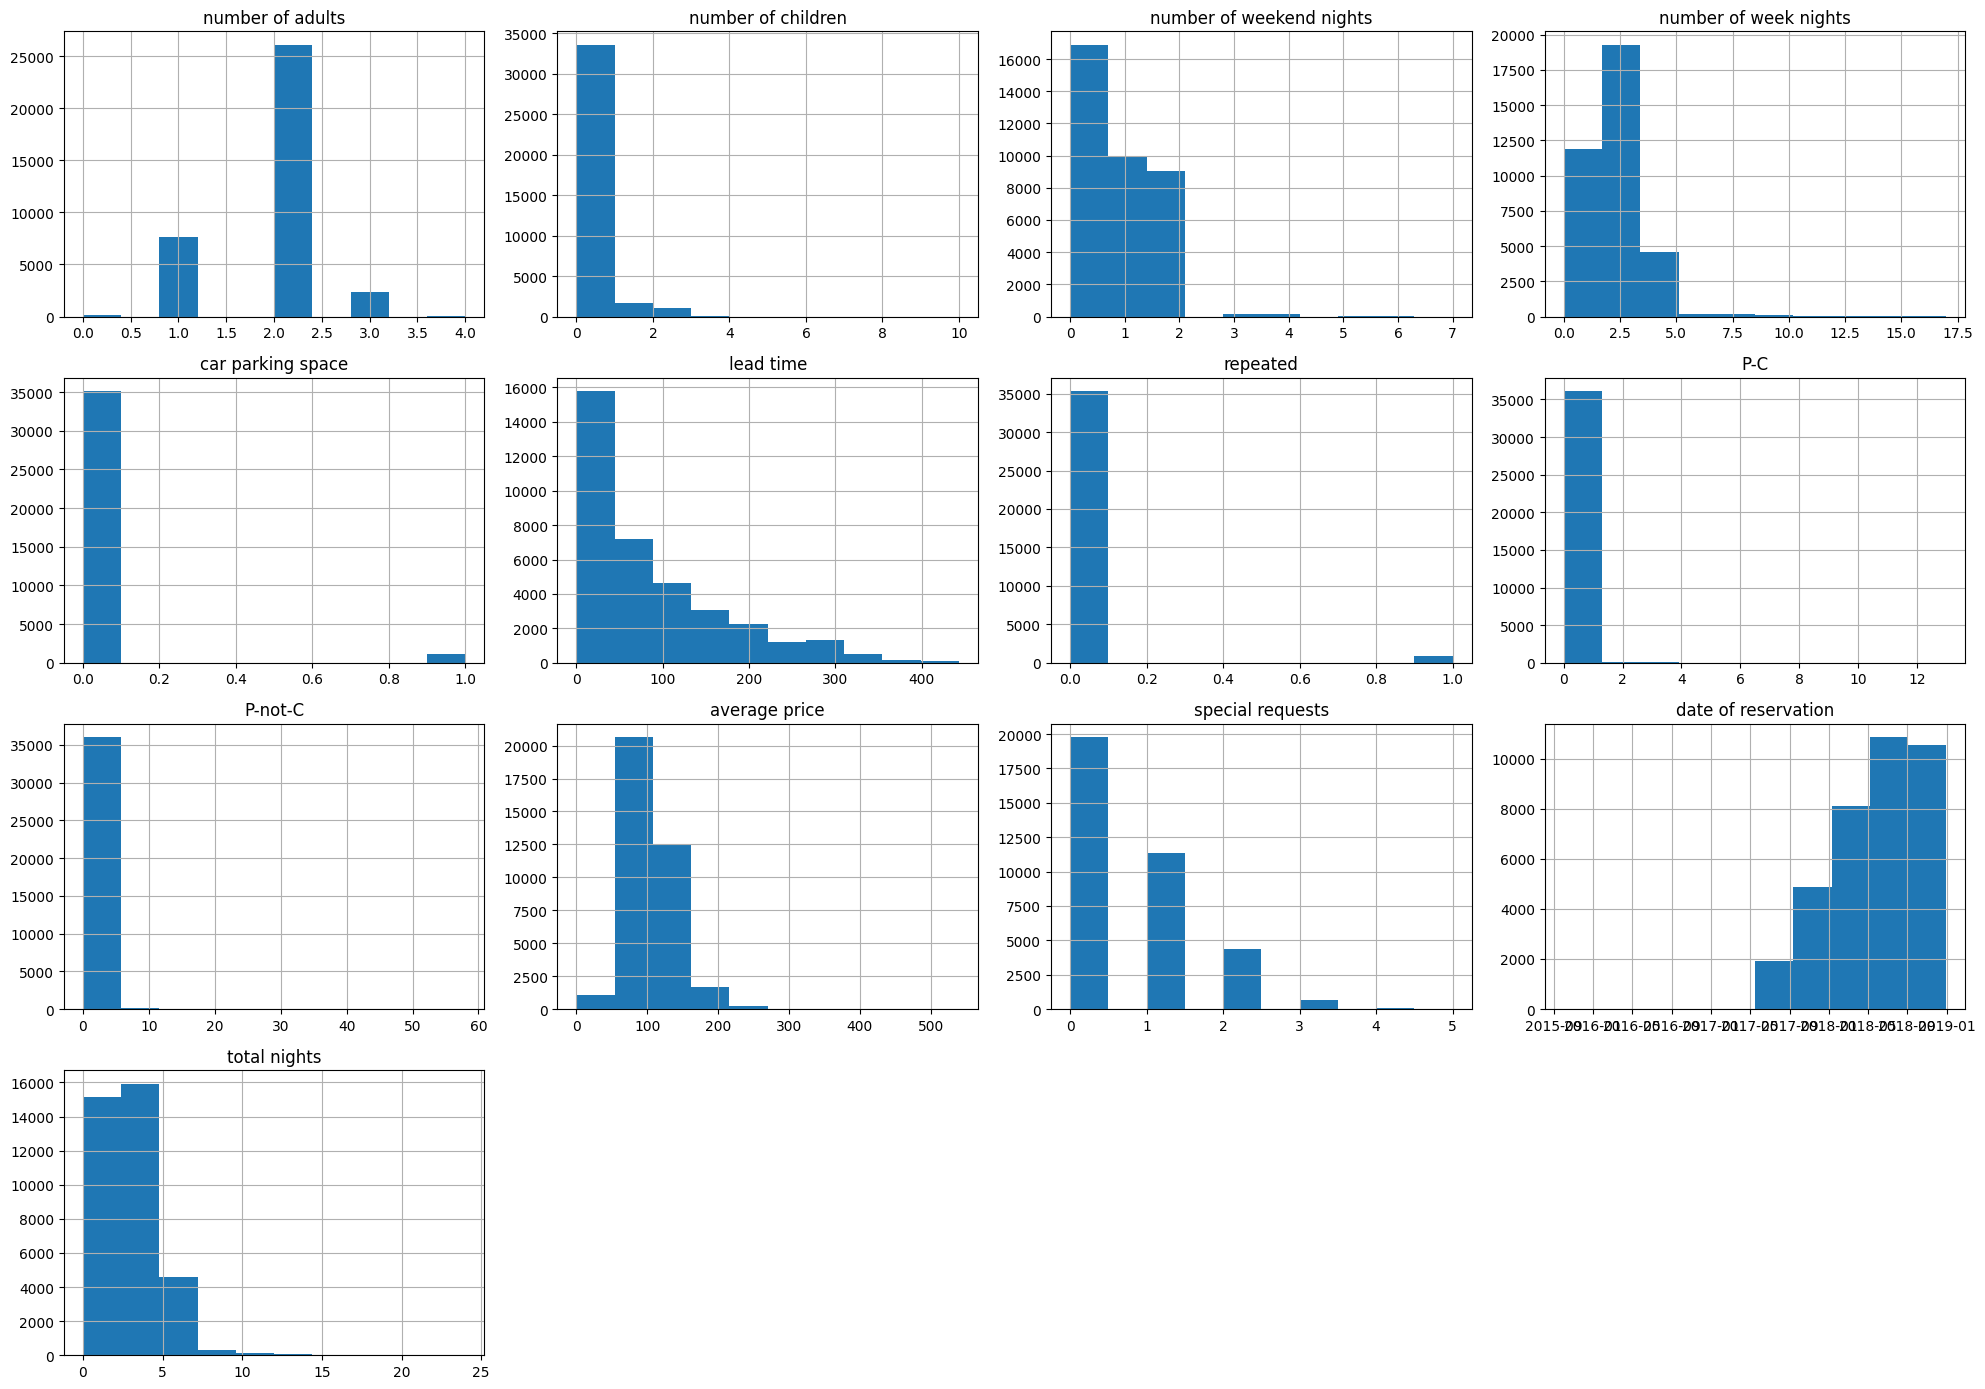

In [6]:
df.hist(figsize=(20,14))
plt.tight_layout()
plt.show()

# Let's determine the percentage of bookings that are canceled versus those that are not.


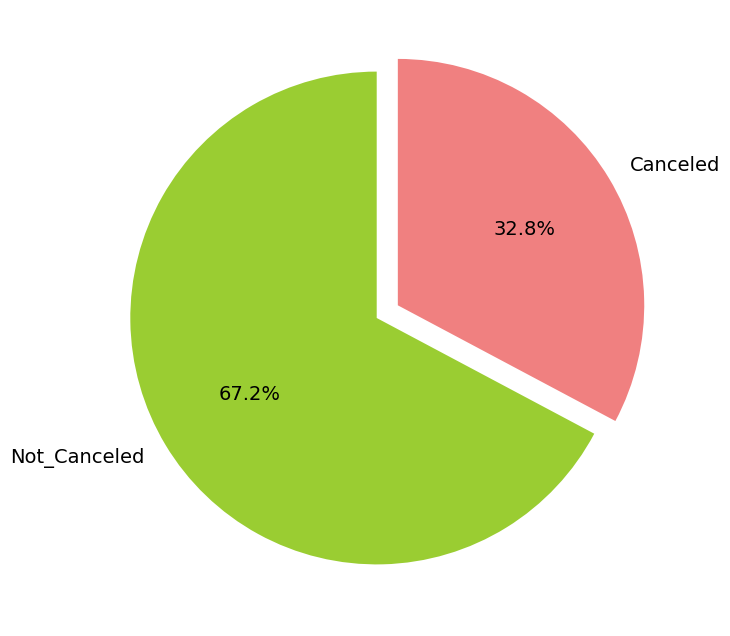

In [7]:
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['booking status'].value_counts().index.tolist()

sizes = df['booking status'].value_counts().tolist()

explode = (0, 0.1)

colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

plt.show()


# Does average price affect booking status (canceled or not)?

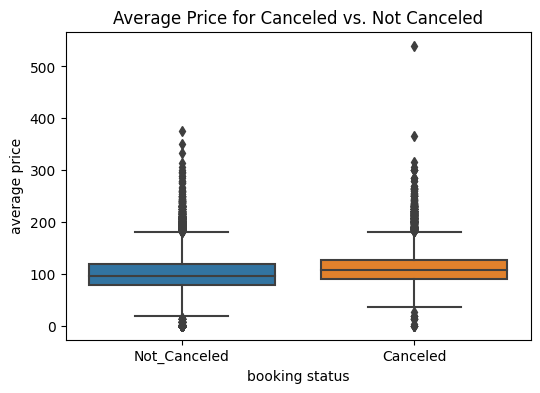

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='booking status', y='average price', data=df)
plt.title("Average Price for Canceled vs. Not Canceled")
plt.show()

# So what is the distribution for adults and children in booking?


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


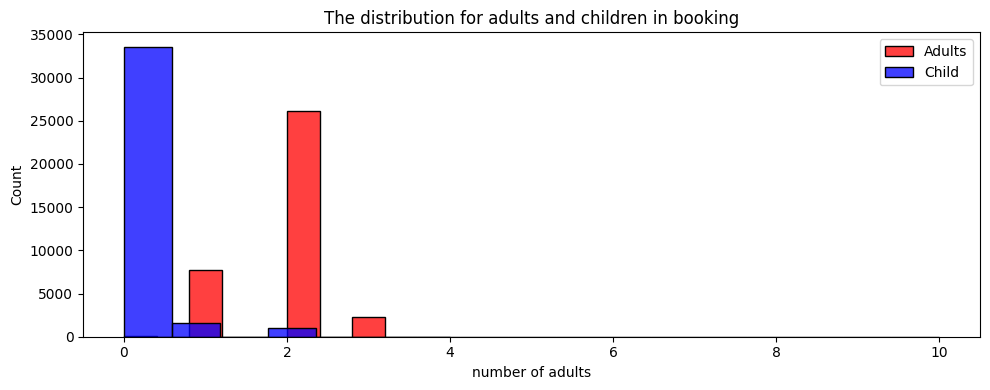

In [9]:
plt.figure(figsize=(10, 4))

sns.histplot( df['number of adults'],bins = 10, label='Adults', color='red')
sns.histplot (df['number of children'],label='Child', color='blue')
plt.title("The distribution for adults and children in booking")
plt.legend()
plt.tight_layout()
plt.show()

# Let's analyze how average prices vary with total nights and whether this influences booking cancellations.


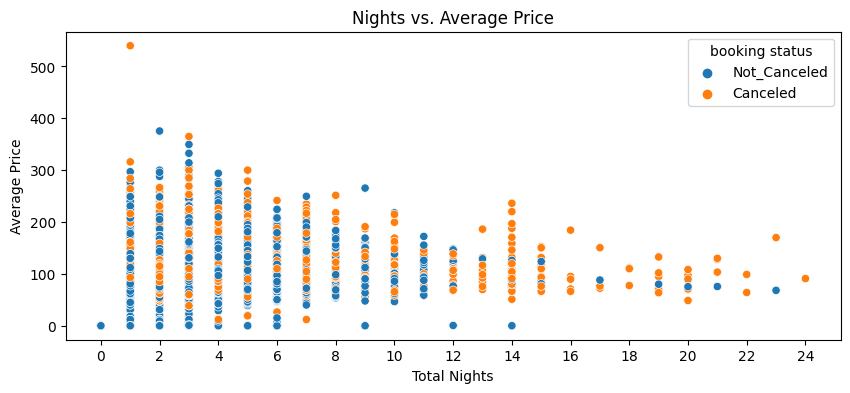

In [10]:
plt.figure(figsize=(10, 4))

sns.scatterplot(x=df['total nights'], y=df['average price'],hue = df['booking status'])
plt.xlabel("Total Nights")
plt.ylabel("Average Price")
plt.title("Nights vs. Average Price")
max_nights = (df['number of weekend nights'] + df['number of week nights']).max()
plt.xticks(range(0, int(max_nights) + 1, 2))
plt.show()

# What is the most common meal plan, and how does it correlate with average prices?


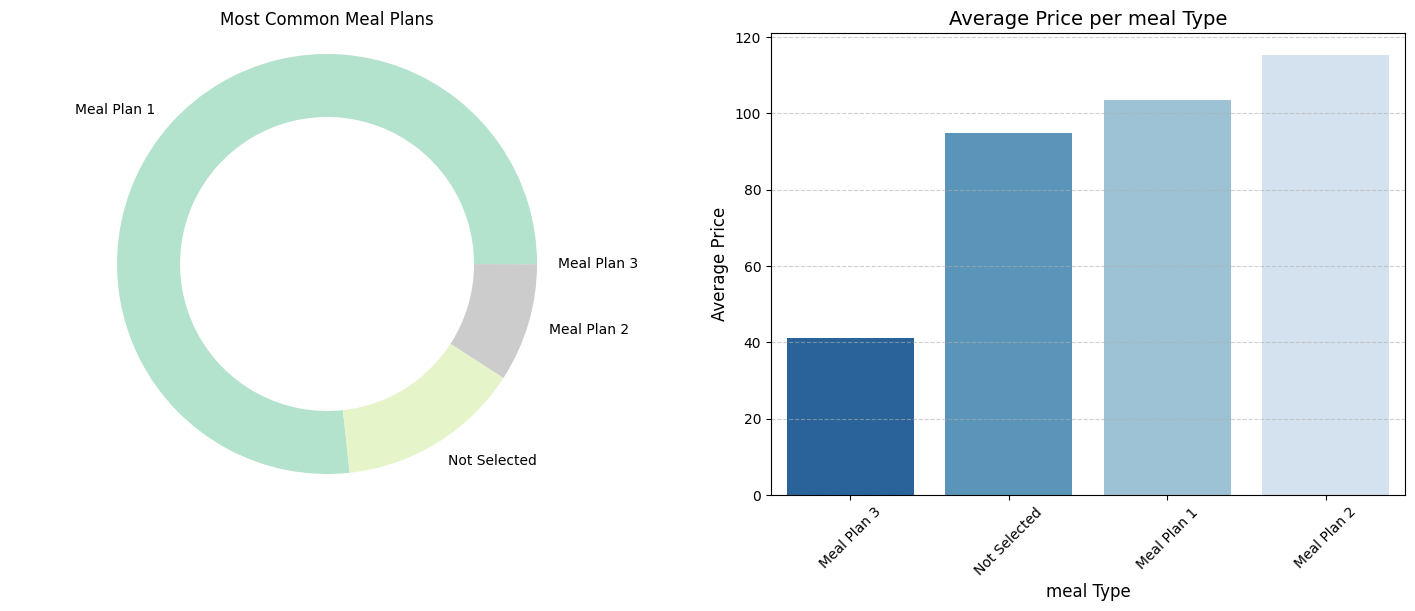

In [11]:
meal_counts = df['type of meal'].value_counts()
meal_price = df.groupby("type of meal")["average price"].mean().sort_values()
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
plt.pie(meal_counts, labels=meal_counts.index,colors = colors,wedgeprops=dict(width=0.3))
plt.title("Most Common Meal Plans")
plt.axis('equal') 

plt.subplot(1,2,2)
sns.barplot(x=meal_price.index, y=meal_price.values, palette="Blues_r")
plt.title("Average Price per meal Type", fontsize=14)
plt.xlabel("meal Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.show()

# We need to determine if parking prices lead to booking cancellations and what the average price is.

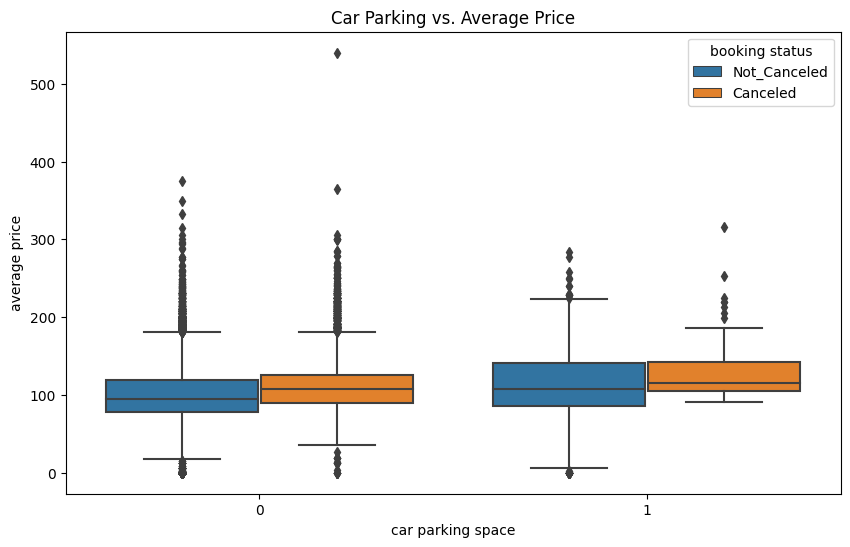

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='car parking space', y='average price',hue ="booking status", data=df)
plt.title("Car Parking vs. Average Price")
plt.show()

# What are the most common room types and their average prices?

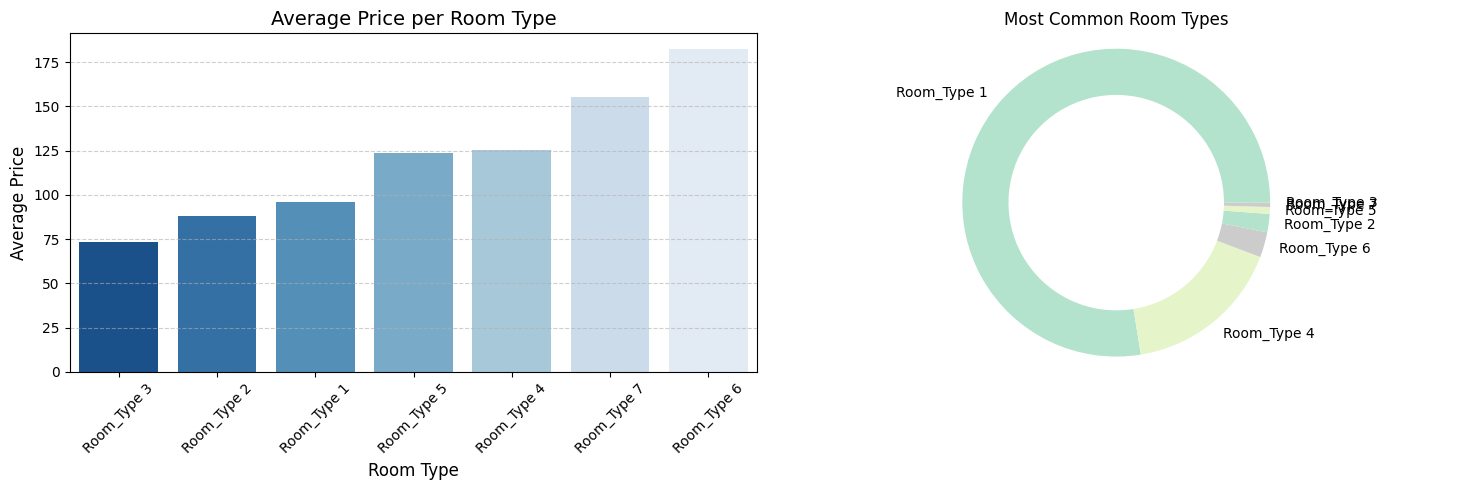

In [13]:
room_types = df['room type'].value_counts()
room_price = df.groupby("room type")["average price"].mean().sort_values()
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
plt.pie(room_types, labels=room_types.index,colors = colors,wedgeprops=dict(width=0.3))
plt.title("Most Common Room Types")
plt.axis('equal') 

plt.subplot(1,2,1)
sns.barplot(x=room_price.index, y=room_price.values, palette="Blues_r")
plt.title("Average Price per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

# Does the market segment impact the average price?

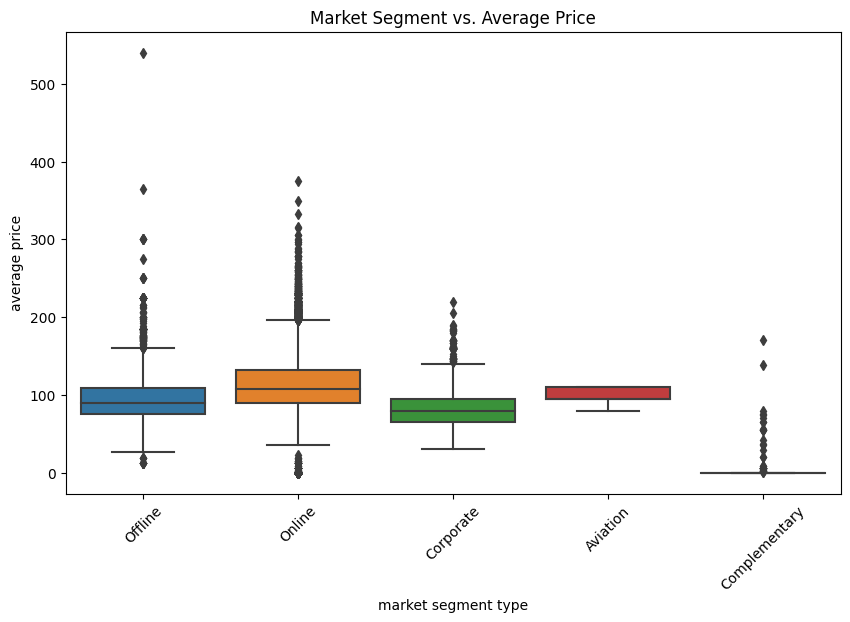

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='market segment type', y='average price', data=df)
plt.xticks(rotation=45)
plt.title("Market Segment vs. Average Price")
plt.show()

# Let's examine if the market segment type affects booking status (canceled vs. not canceled).

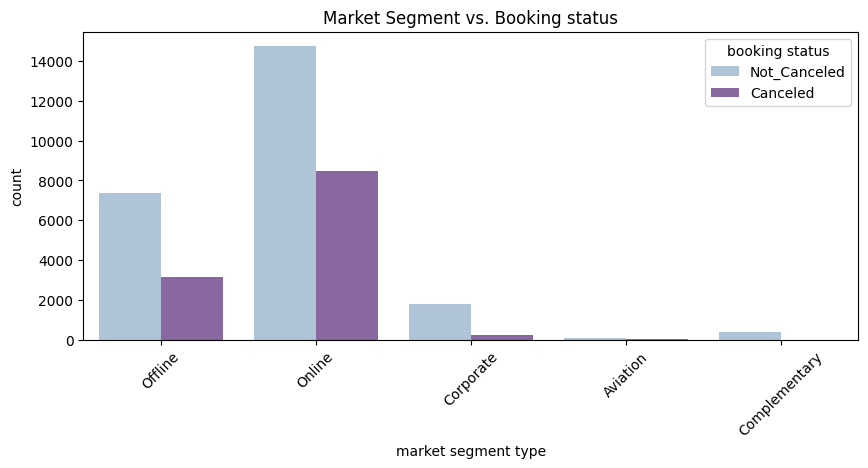

In [15]:
plt.figure(figsize=(10, 4))
sns.countplot(x='market segment type', hue='booking status', data=df, palette="BuPu")
plt.xticks(rotation=45)
plt.title("Market Segment vs. Booking status")
plt.show()

# We need to determine if there are trends in bookings over the years and how they affect booking status.

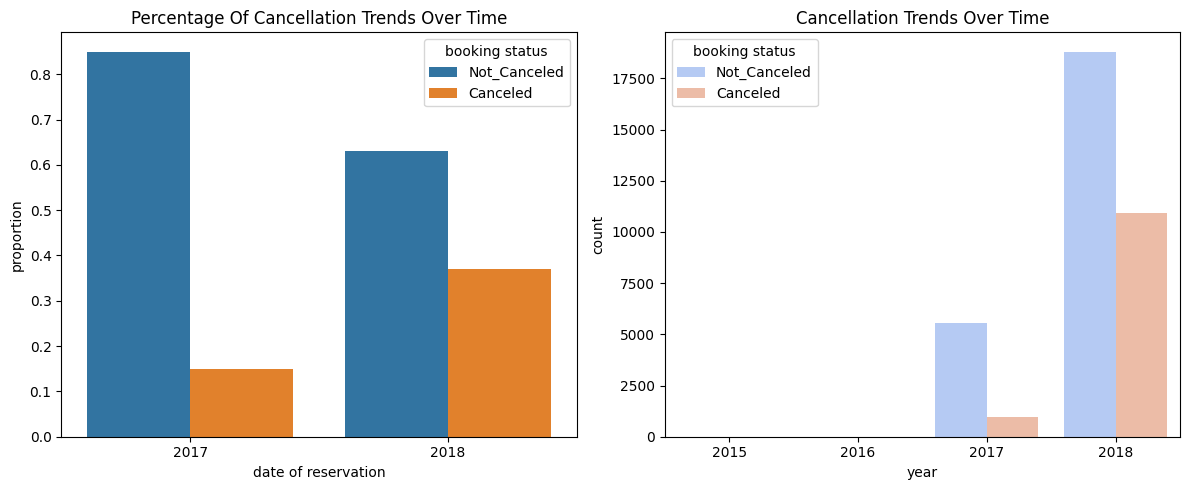

In [16]:
P_cancellation_over_time = df.groupby(df['date of reservation'].dt.year)['booking status'].value_counts(normalize =True).reset_index()
P_cancellation_over_time = P_cancellation_over_time[P_cancellation_over_time['date of reservation'].isin([2017,2018])].round(2).set_index('date of reservation')

df['year'] = df['date of reservation'].dt.year
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
sns.countplot(x='year',hue='booking status', data=df, palette='coolwarm')
plt.title("Cancellation Trends Over Time")
plt.tight_layout()


plt.subplot(1,2,1)
sns.barplot(x=P_cancellation_over_time.index ,y = P_cancellation_over_time['proportion'],hue = P_cancellation_over_time['booking status'])
plt.title("Percentage Of Cancellation Trends Over Time")
plt.tight_layout()
plt.show()




# Let's identify if families are the most common guest type and analyze their cancellation rates.

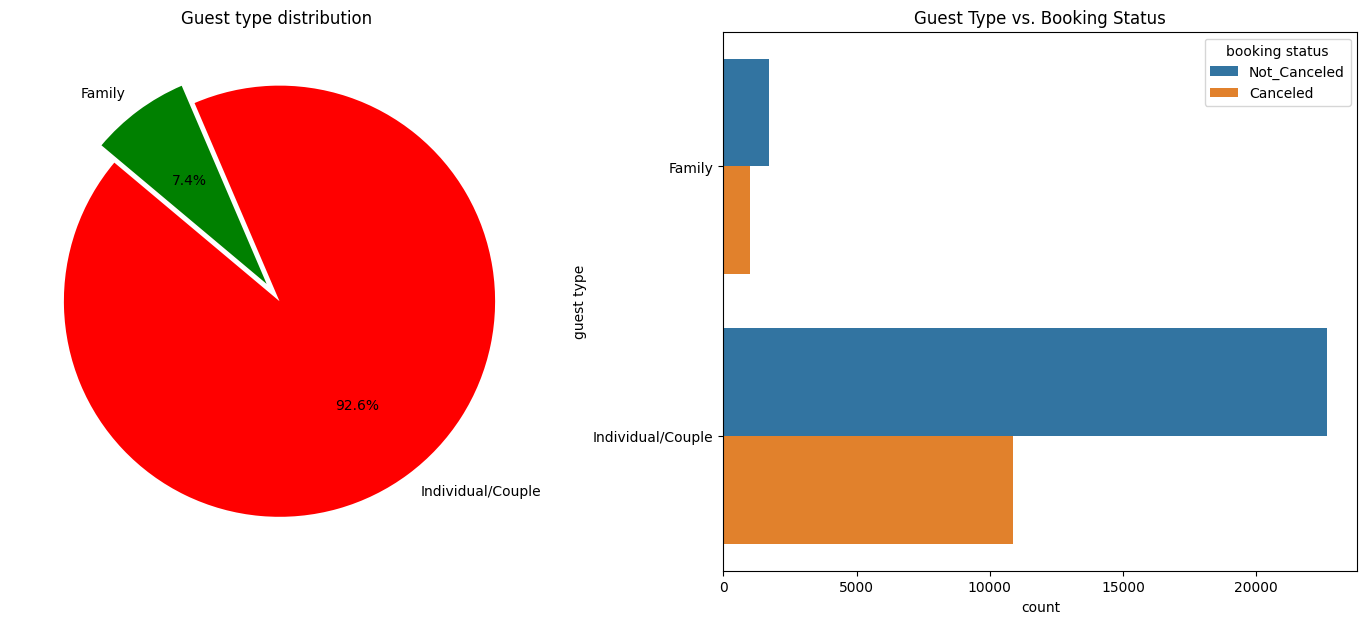

In [17]:
guest_type = df['guest type'].value_counts()


plt.figure(figsize=(18, 7))

plt.subplot(1,2,2)
sns.countplot(y='guest type', data=df, hue='booking status')
plt.title("Guest Type vs. Booking Status")

plt.subplot(1,2,1)
colors = ["red", "green"] 
plt.pie(guest_type, labels=guest_type.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0, 0.1])
plt.title("Guest type distribution ")

plt.show()

# Does lead time affect cancellations?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


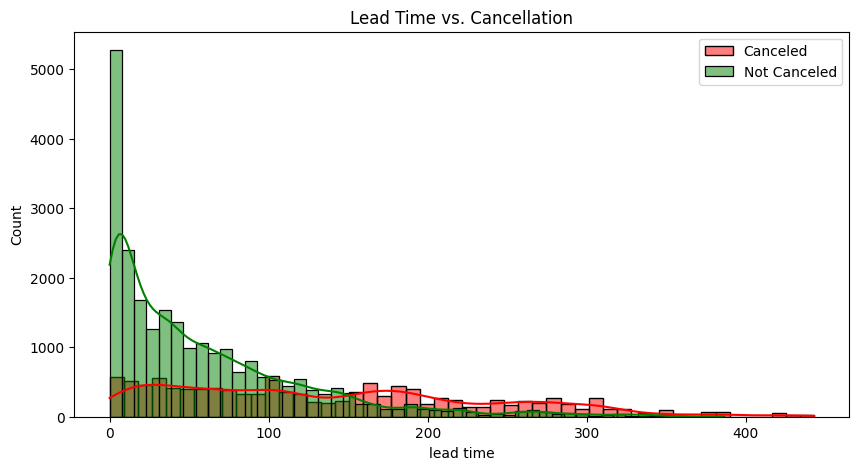

In [18]:

lead_time_canceled = df[df['booking status'] == 'Canceled']['lead time']

lead_time_not_canceled = df[df['booking status'] == 'Not_Canceled']['lead time']

plt.figure(figsize=(10, 5))
sns.histplot(lead_time_canceled, bins=50,label='Canceled',kde = True, color='red')
sns.histplot(lead_time_not_canceled, bins=50,label='Not Canceled',kde = True ,color='green')
plt.legend()
plt.title("Lead Time vs. Cancellation")
plt.show()

# Do we have any returning customers? Let's tally them up and check for any cancellations.

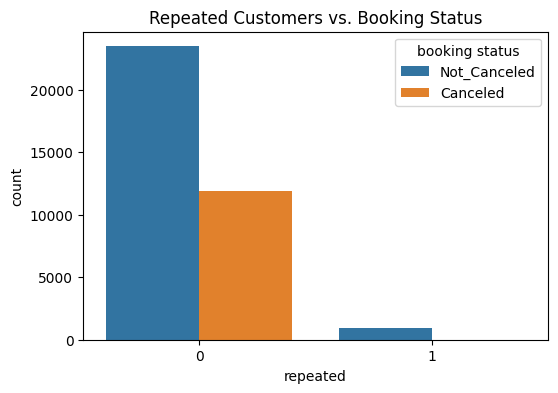

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='repeated', hue='booking status', data=df)
plt.title("Repeated Customers vs. Booking Status")
plt.show()

# Are there specific months or seasons with the highest number of bookings?

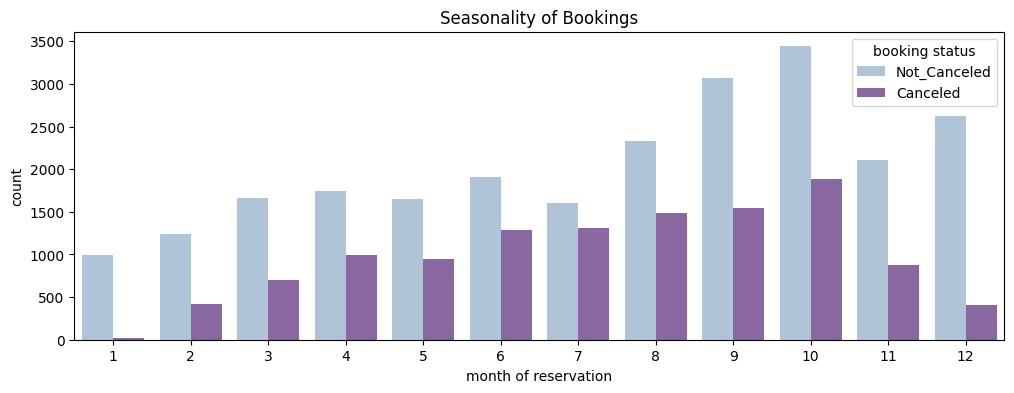

In [20]:
#Add a new column for the reservation month.
df['month of reservation'] = df['date of reservation'].dt.month

plt.figure(figsize=(12, 4))
sns.countplot(x='month of reservation',hue = 'booking status', data=df,palette="BuPu")
plt.title("Seasonality of Bookings")
plt.show()

# So is there any specific day ? 


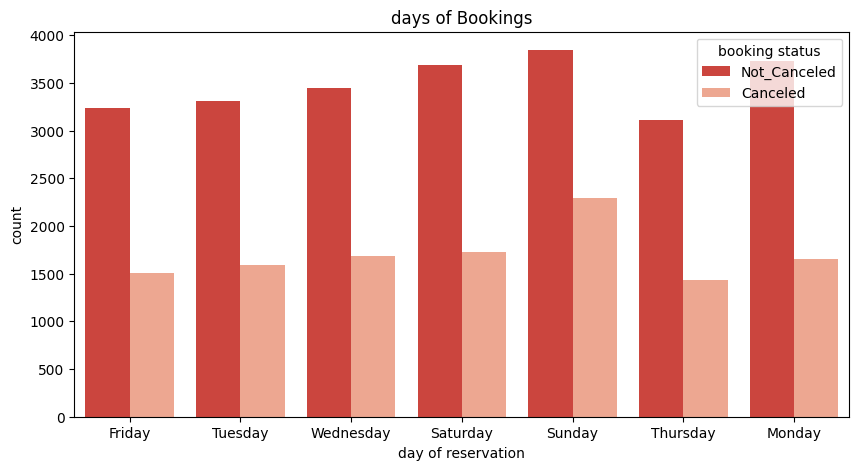

In [21]:
#Add a new column for the reservation day name.
df['day of reservation'] = df['date of reservation'].dt.day_name()

plt.figure(figsize=(10, 5))
sns.countplot(x='day of reservation',hue = 'booking status', data=df, palette="Reds_r")
plt.title("days of Bookings")
plt.show()

# Does the presence of a children affect room type choice?

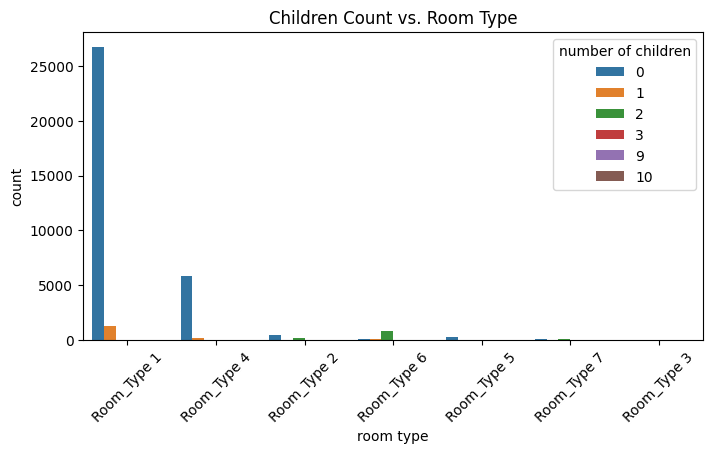

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(x='room type', hue='number of children', data=df)
plt.title("Children Count vs. Room Type")
plt.xticks(rotation=45)
plt.show()

# Do special requests impact cancellations? What is the average number of special requests per room?

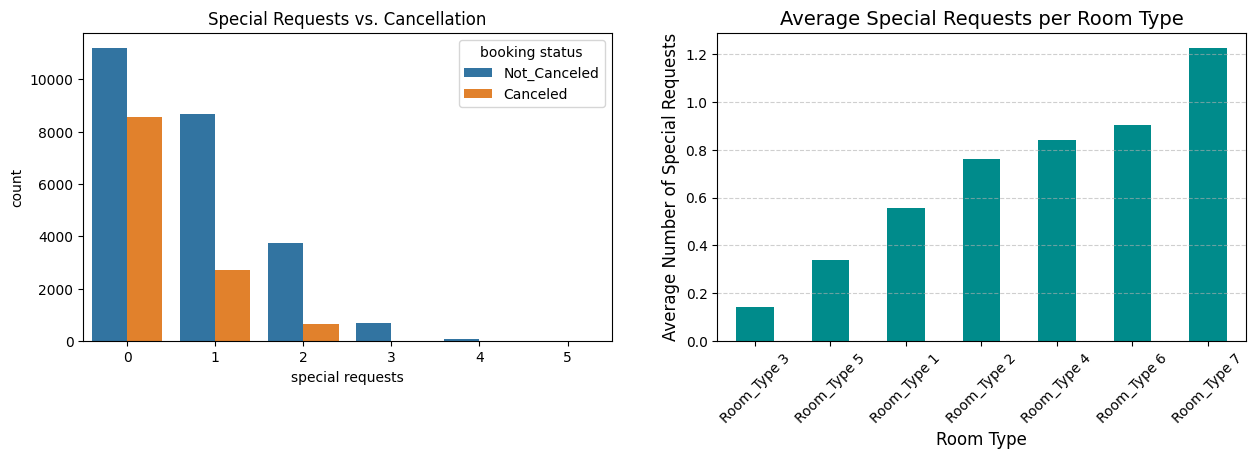

In [23]:
room_special_requests = df.groupby("room type")["special requests"].mean()

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x='special requests',hue = 'booking status', data=df)
plt.title("Special Requests vs. Cancellation")


plt.subplot(1,2,2)
room_special_requests.sort_values().plot(kind="bar", color="darkcyan")

plt.title("Average Special Requests per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Number of Special Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

#  Heatmap of Correlation Between Numerical Variables

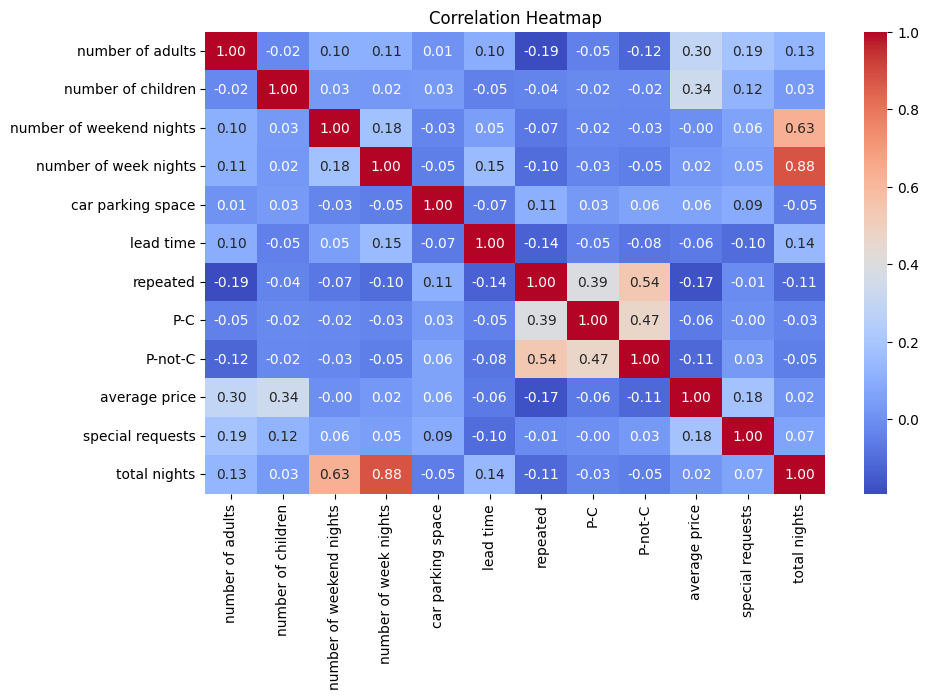

In [24]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()